<a href="https://www.kaggle.com/code/ahmedmakboul/ocr-using-anns?scriptVersionId=164755288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import numpy  as np


%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/emnist/emnist-mnist-train.csv")

In [3]:
data.iloc[:,0]=data.iloc[:,0]-1

In [4]:
data.iloc[:,0].min(),data.iloc[:,0].max()

(0, 25)

In [5]:
x = data.iloc[:,1:].values
y=data.iloc[:,0].values
x.shape,y.shape

((88799, 784), (88799,))

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((71039, 784), (17760, 784), (71039,), (17760,))

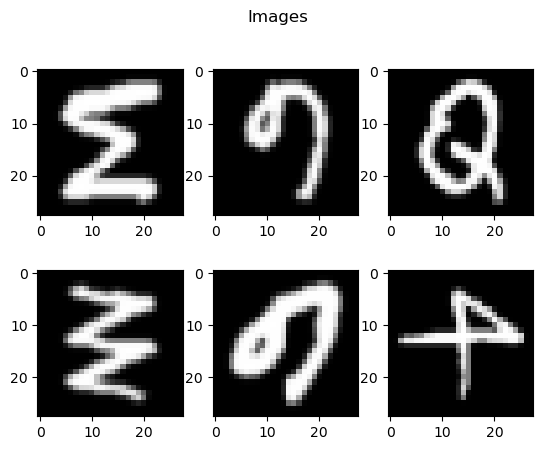

In [9]:
plt.suptitle('Images')
for i in range(6):
    image = x_train[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.imshow(image,cmap="gray")


# Model:

In [10]:
model= Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=512,activation="relu",name="layer1"),
    Dense(units=256,activation="relu",name="layer2"),
    Dense(units=26,activation="linear",name="layer3")
],name="Mymodel"
)

In [11]:
model.summary()

Model: "Mymodel"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 layer1 (Dense)              (None, 512)               401920    

                                                                 

 layer2 (Dense)              (None, 256)               131328    

                                                                 

 layer3 (Dense)              (None, 26)                6682      

                                                                 


Total params: 539930 (2.06 MB)

Trainable params: 539930 (2.06 MB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


In [12]:
[layer1,layer2,layer3]=model.layers

w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()

print(f"w1 shape:{w1.shape} , b1 shape: {b1.shape}")
print(f"w2 shape:{w2.shape} , b2 shape: {b2.shape}")
print(f"w3 shape:{w3.shape} , b3 shape: {b3.shape}")

w1 shape:(784, 512) , b1 shape: (512,)

w2 shape:(512, 256) , b2 shape: (256,)

w3 shape:(256, 26) , b3 shape: (26,)


In [13]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True)
              ,optimizer=Adam(learning_rate=1e-3)
              , metrics=["accuracy"]
)

In [14]:
x_train=np.array(x_train)

In [15]:
Letter_recognition=model.fit(
    x_train,y_train,
    epochs=100,batch_size=32
)

Epoch 1/100







2220/2220 [==============================] - 8s 3ms/step - loss: 0.6391 - accuracy: 0.8012

Epoch 2/100

2220/2220 [==============================] - 7s 3ms/step - loss: 0.3393 - accuracy: 0.8885

Epoch 3/100

2220/2220 [==============================] - 7s 3ms/step - loss: 0.2680 - accuracy: 0.9095

Epoch 4/100

2220/2220 [==============================] - 7s 3ms/step - loss: 0.2197 - accuracy: 0.9227

Epoch 5/100

2220/2220 [==============================] - 7s 3ms/step - loss: 0.1891 - accuracy: 0.9312

Epoch 6/100

2220/2220 [==============================] - 8s 3ms/step - loss: 0.1661 - accuracy: 0.9379

Epoch 7/100

2220/2220 [==============================] - 8s 3ms/step - loss: 0.1501 - accuracy: 0.9438

Epoch 8/100

2220/2220 [==============================] - 7s 3ms/step - loss: 0.1332 - accuracy: 0.9486

Epoch 9/100

2220/2220 [==============================] - 8s 3ms/step - loss: 0.1241 - accuracy: 0.9525

Epoch 10/100

2220/2220 [========================

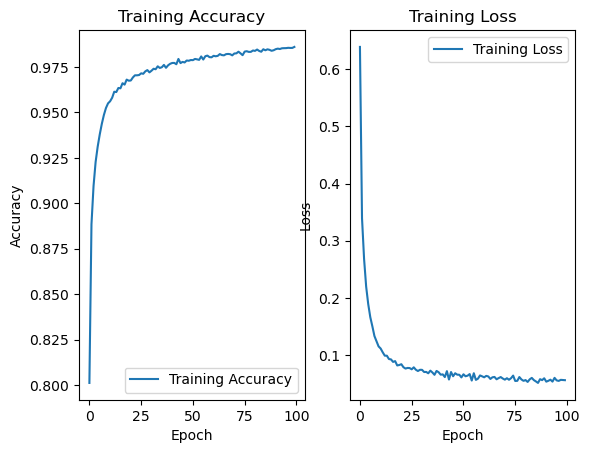

In [16]:
plt.subplot(1, 2, 1)
plt.plot(Letter_recognition.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(Letter_recognition.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
prediction_model=model.predict(x_test)

555/555 [==============================] - 1s 1ms/step


In [18]:
prediction_p=tf.nn.softmax(prediction_model)
predicted_labels = np.argmax(prediction_p, axis=1)

In [19]:
loss,Accuracy=model.evaluate(x_test,y_test)

555/555 [==============================] - 1s 1ms/step - loss: 2.4451 - accuracy: 0.9028


In [20]:
Accuracy 

0.9027590155601501

# Testing Model :

In [21]:
def letter(prediction):
         letters={i: chr(ord('a') + i) for i in range(26)}
    
         return letters[prediction]

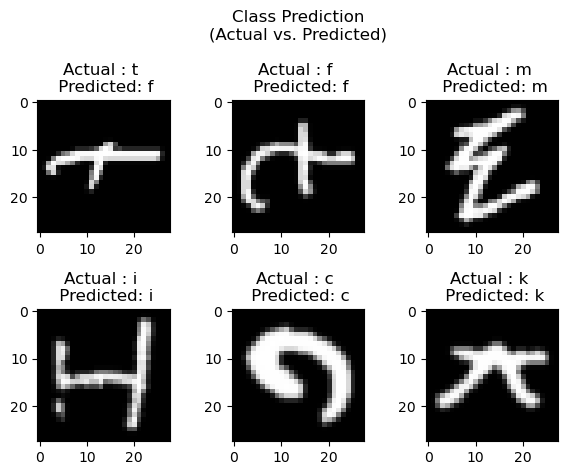

In [22]:
plt.suptitle("Class Prediction\n(Actual vs. Predicted)")
for i in range(6):
    image = x_test[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {letter(y_test[i])} \n Predicted: {letter(predicted_labels[i])}")
    plt.imshow(image,cmap="gray")
    plt.tight_layout()

# Model Evaluation :

In [23]:
conf_matrix = confusion_matrix(y_test,predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')  
recall = recall_score(y_test, predicted_labels, average='weighted')  
f1 = f1_score(y_test, predicted_labels, average='weighted')  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 90.28%

Precision: 0.90

Recall: 0.90

F1 Score: 0.90


# Confusion Matrix for Class Prediction :


<Axes: >

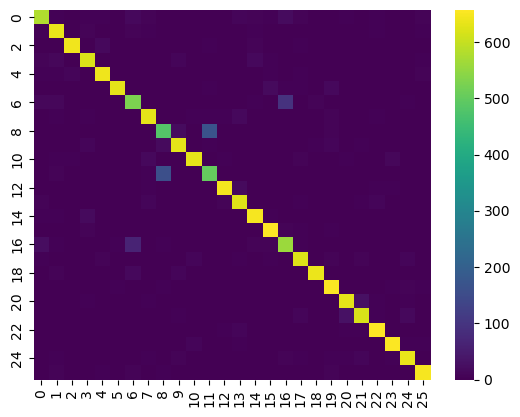

In [24]:
sns.heatmap(conf_matrix,cmap='viridis')